In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
data_base = automap_base()

In [6]:
data_base.prepare(engine, reflect=True)

In [7]:
data_base.classes.keys()

['measurement', 'station']

In [8]:
measurement = data_base.classes.measurement
station = data_base.classes.station

In [9]:
session = Session(engine)

In [10]:
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [11]:
start_date = dt.date(2017, 8, 23)

end_date = start_date - dt.timedelta(days=365)

sel = [measurement.date, measurement.prcp]

prec_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date>end_date).\
order_by(measurement.date).all()
prec_scores[0:10]

precip_data = pd.DataFrame(prec_scores, columns=["date", "precipitation"])

sorted_data = precip_data.sort_values(by='date').dropna()

sorted_data.head()

,date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15


Text(0, 0.5, 'Inches')

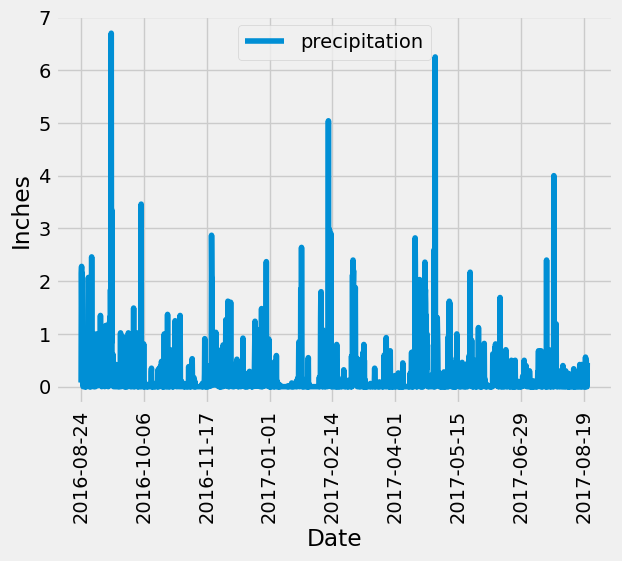

In [12]:
sorted_data.plot(x="date", y="precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [13]:
precip_data.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
station_count = [session.query(station.id).count()]
station_count

[9]

In [15]:
station_activity = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
mostactive_station = 'USC00519281'
temperatures = session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == mostactive_station).all()
temperatures

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

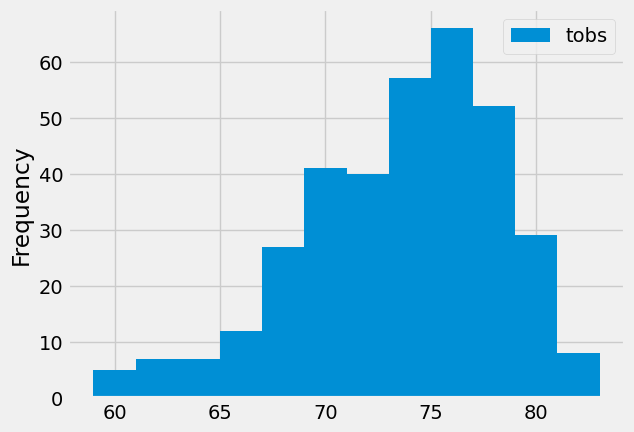

In [17]:
high_observation_station = station_activity[0][0]

observations = session.query(measurement.date, measurement.tobs).\
                        filter(measurement.date >= "2016-08-24").\
                        filter(measurement.date <= "2017-08-23").\
                        filter(measurement.station == high_observation_station).all()

observation_data = pd.DataFrame(observations)


observation_data.plot.hist(bins=12)

#plt.xlabel = ("Temperature")

#plt.ylabel = ("Frequency")

#plt.show()

In [18]:
session.close()